In [10]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [11]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [12]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([5, 3, 2, 8, 6, 1, 0, 9, 7]), tensor([10,  4]))

In [13]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [14]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[4.8304],
        [3.9647]], grad_fn=<AddmmBackward0>)

In [41]:
linear_model.weight

Parameter containing:
tensor([[5.2905]], requires_grad=True)

In [42]:
linear_model.bias

Parameter containing:
tensor([-16.8819], requires_grad=True)

In [38]:
x = torch.ones(1)
linear_model(x)

tensor([-11.5914], grad_fn=<AddBackward0>)

In [37]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914],
        [-11.5914]], grad_fn=<AddmmBackward0>)

In [19]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [20]:
linear_model.parameters()

<generator object Module.parameters at 0x00000032C8E2CB30>

In [21]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.4925]], requires_grad=True),
 Parameter containing:
 tensor([-0.3326], requires_grad=True)]

In [22]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [23]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 286.1098, Validation loss 479.4328
Epoch 1000, Training loss 3.5014, Validation loss 4.3277
Epoch 2000, Training loss 2.8878, Validation loss 3.3608
Epoch 3000, Training loss 2.8758, Validation loss 3.2481

Parameter containing:
tensor([[5.2905]], requires_grad=True)
Parameter containing:
tensor([-16.8822], requires_grad=True)


In [24]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 174.6810, Validation loss 294.5074
Epoch 1000, Training loss 3.5074, Validation loss 4.3338
Epoch 2000, Training loss 2.8879, Validation loss 3.3615
Epoch 3000, Training loss 2.8758, Validation loss 3.2482

Parameter containing:
tensor([[5.2905]], requires_grad=True)
Parameter containing:
tensor([-16.8819], requires_grad=True)


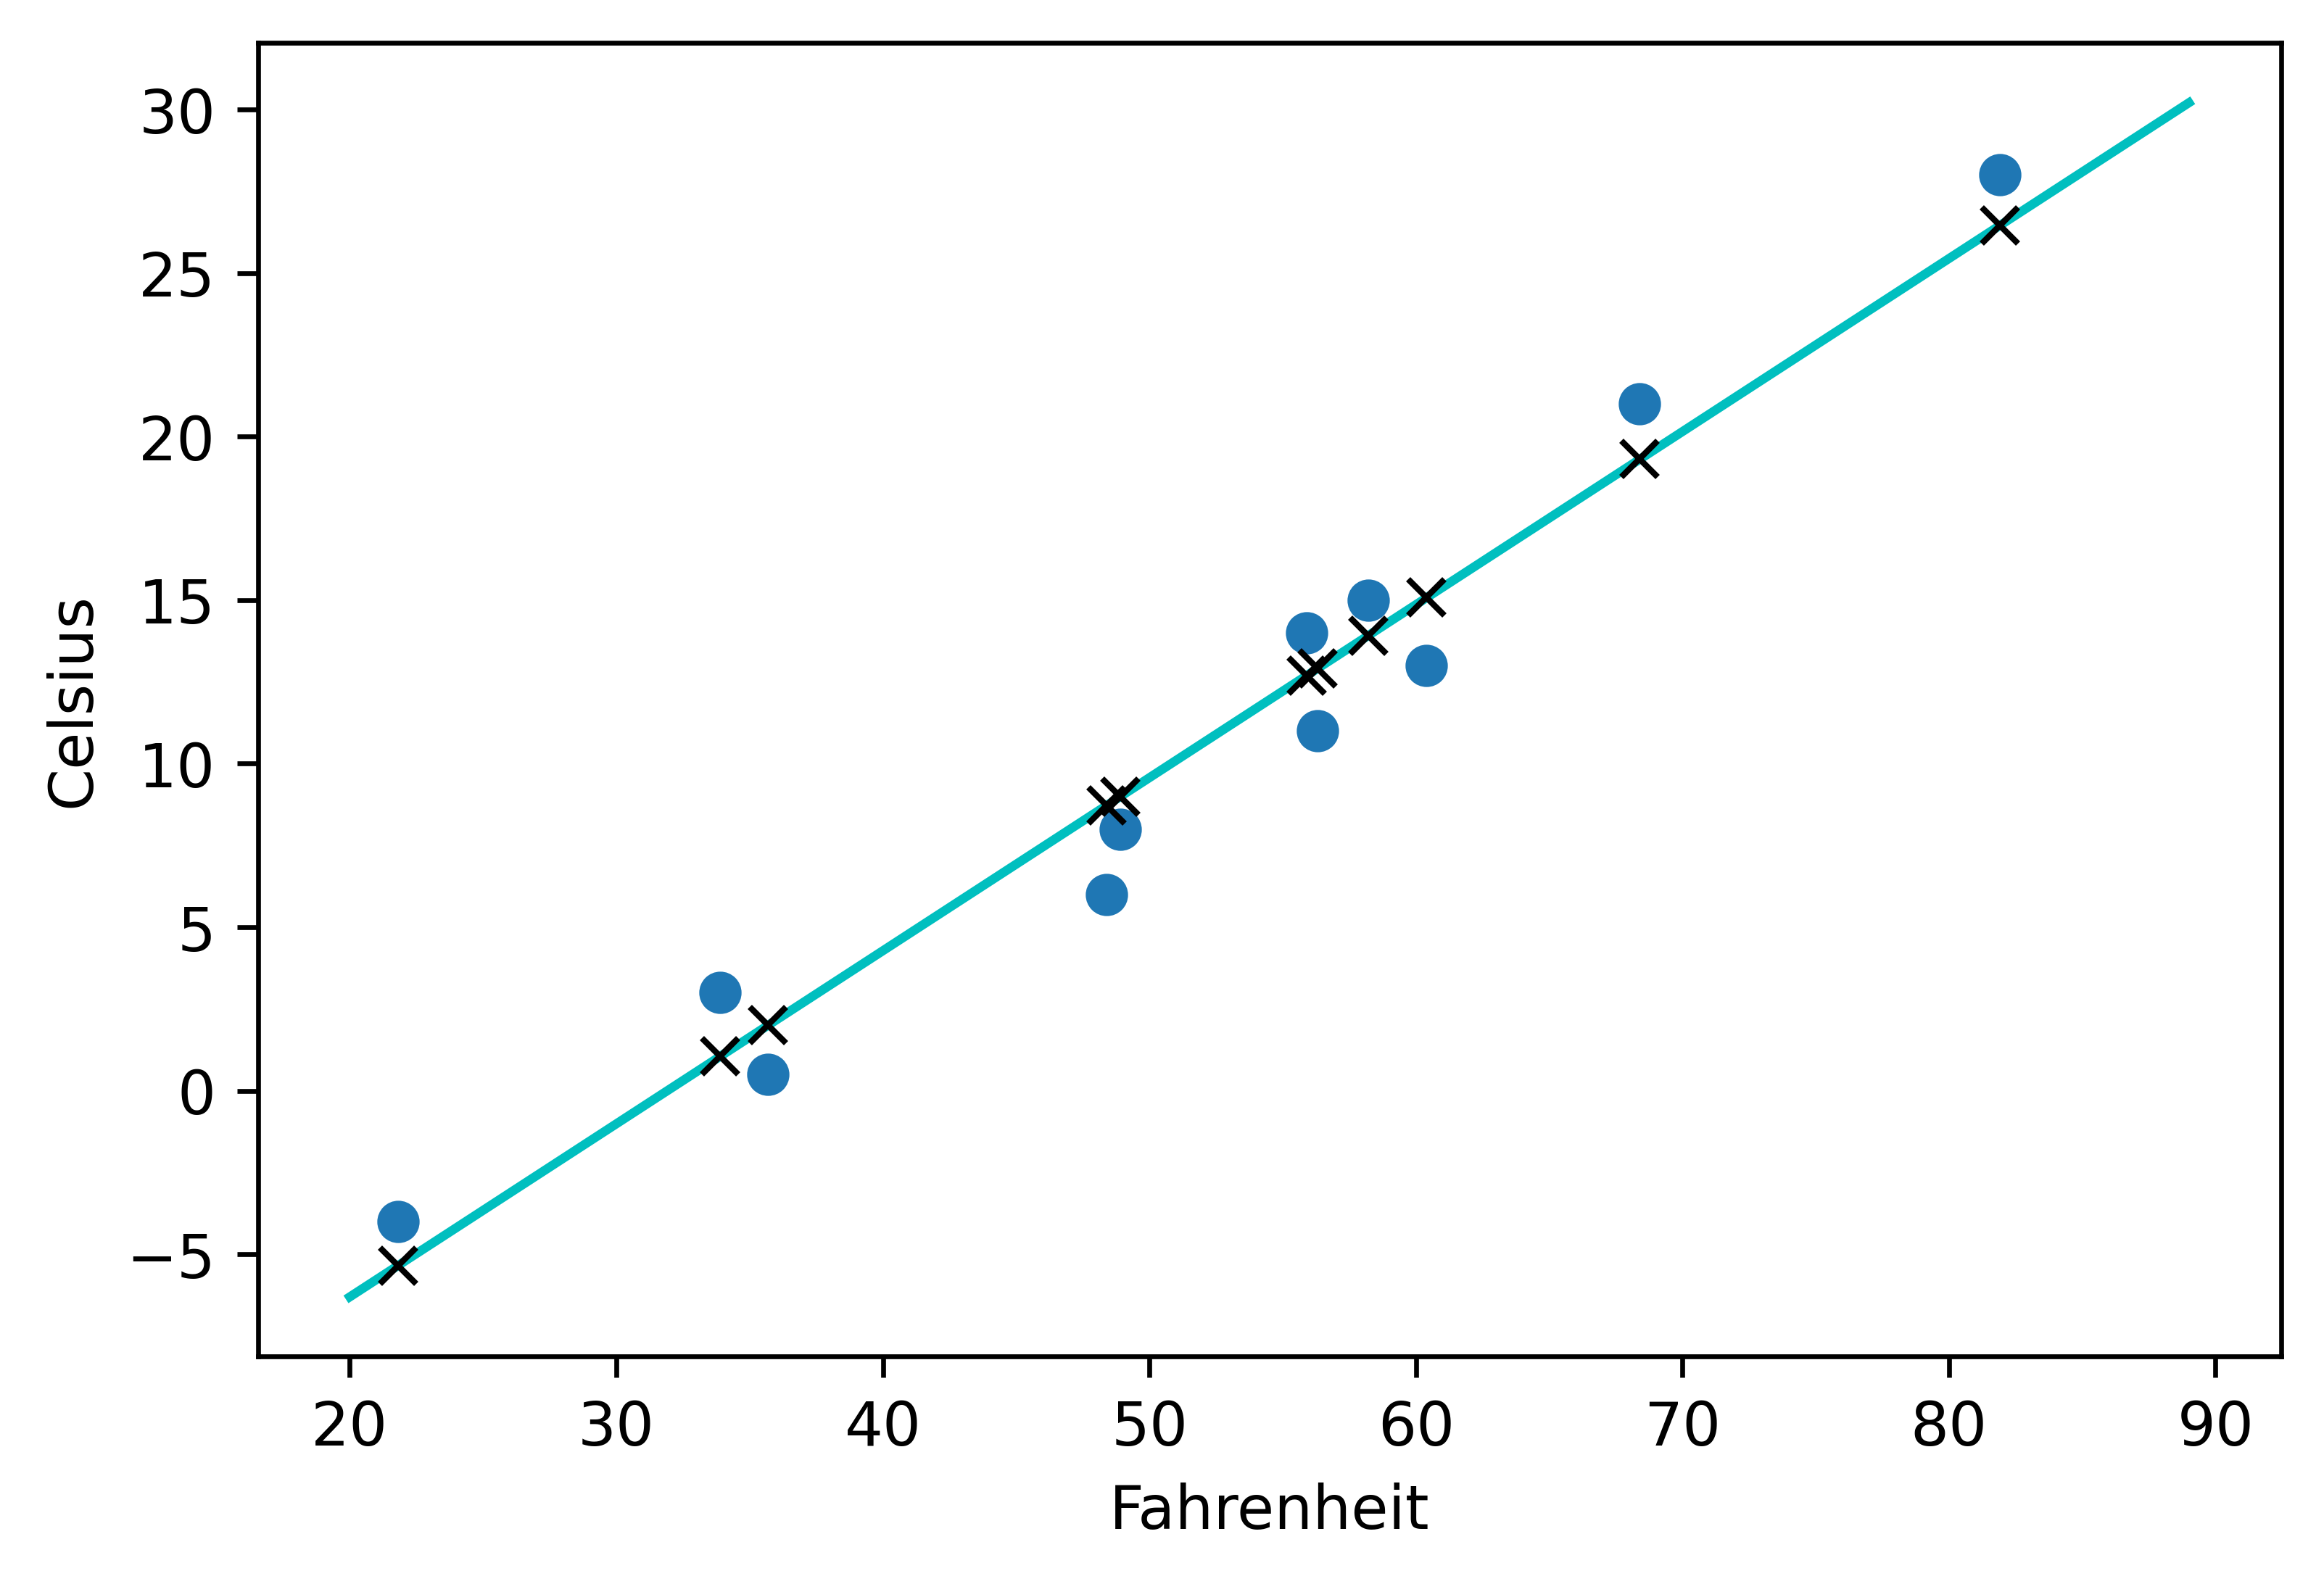

In [43]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), linear_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), linear_model(0.1 * t_u).detach().numpy(), 'kx')


In [25]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [26]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [27]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [28]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [29]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [30]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.3507], requires_grad=True)

In [31]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 163.9801, Validation loss 276.5073
Epoch 1000, Training loss 6.2938, Validation loss 5.1317
Epoch 2000, Training loss 4.1661, Validation loss 5.6355
Epoch 3000, Training loss 2.5841, Validation loss 3.0699
Epoch 4000, Training loss 2.1356, Validation loss 1.8310
Epoch 5000, Training loss 1.9996, Validation loss 1.0559
output tensor([[20.8366],
        [12.3896]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [11.]])
hidden tensor([[ 0.0355],
        [ 0.7106],
        [-0.0415],
        [ 0.0243],
        [ 0.7092],
        [-0.6890],
        [ 0.6780],
        [ 0.0042]])


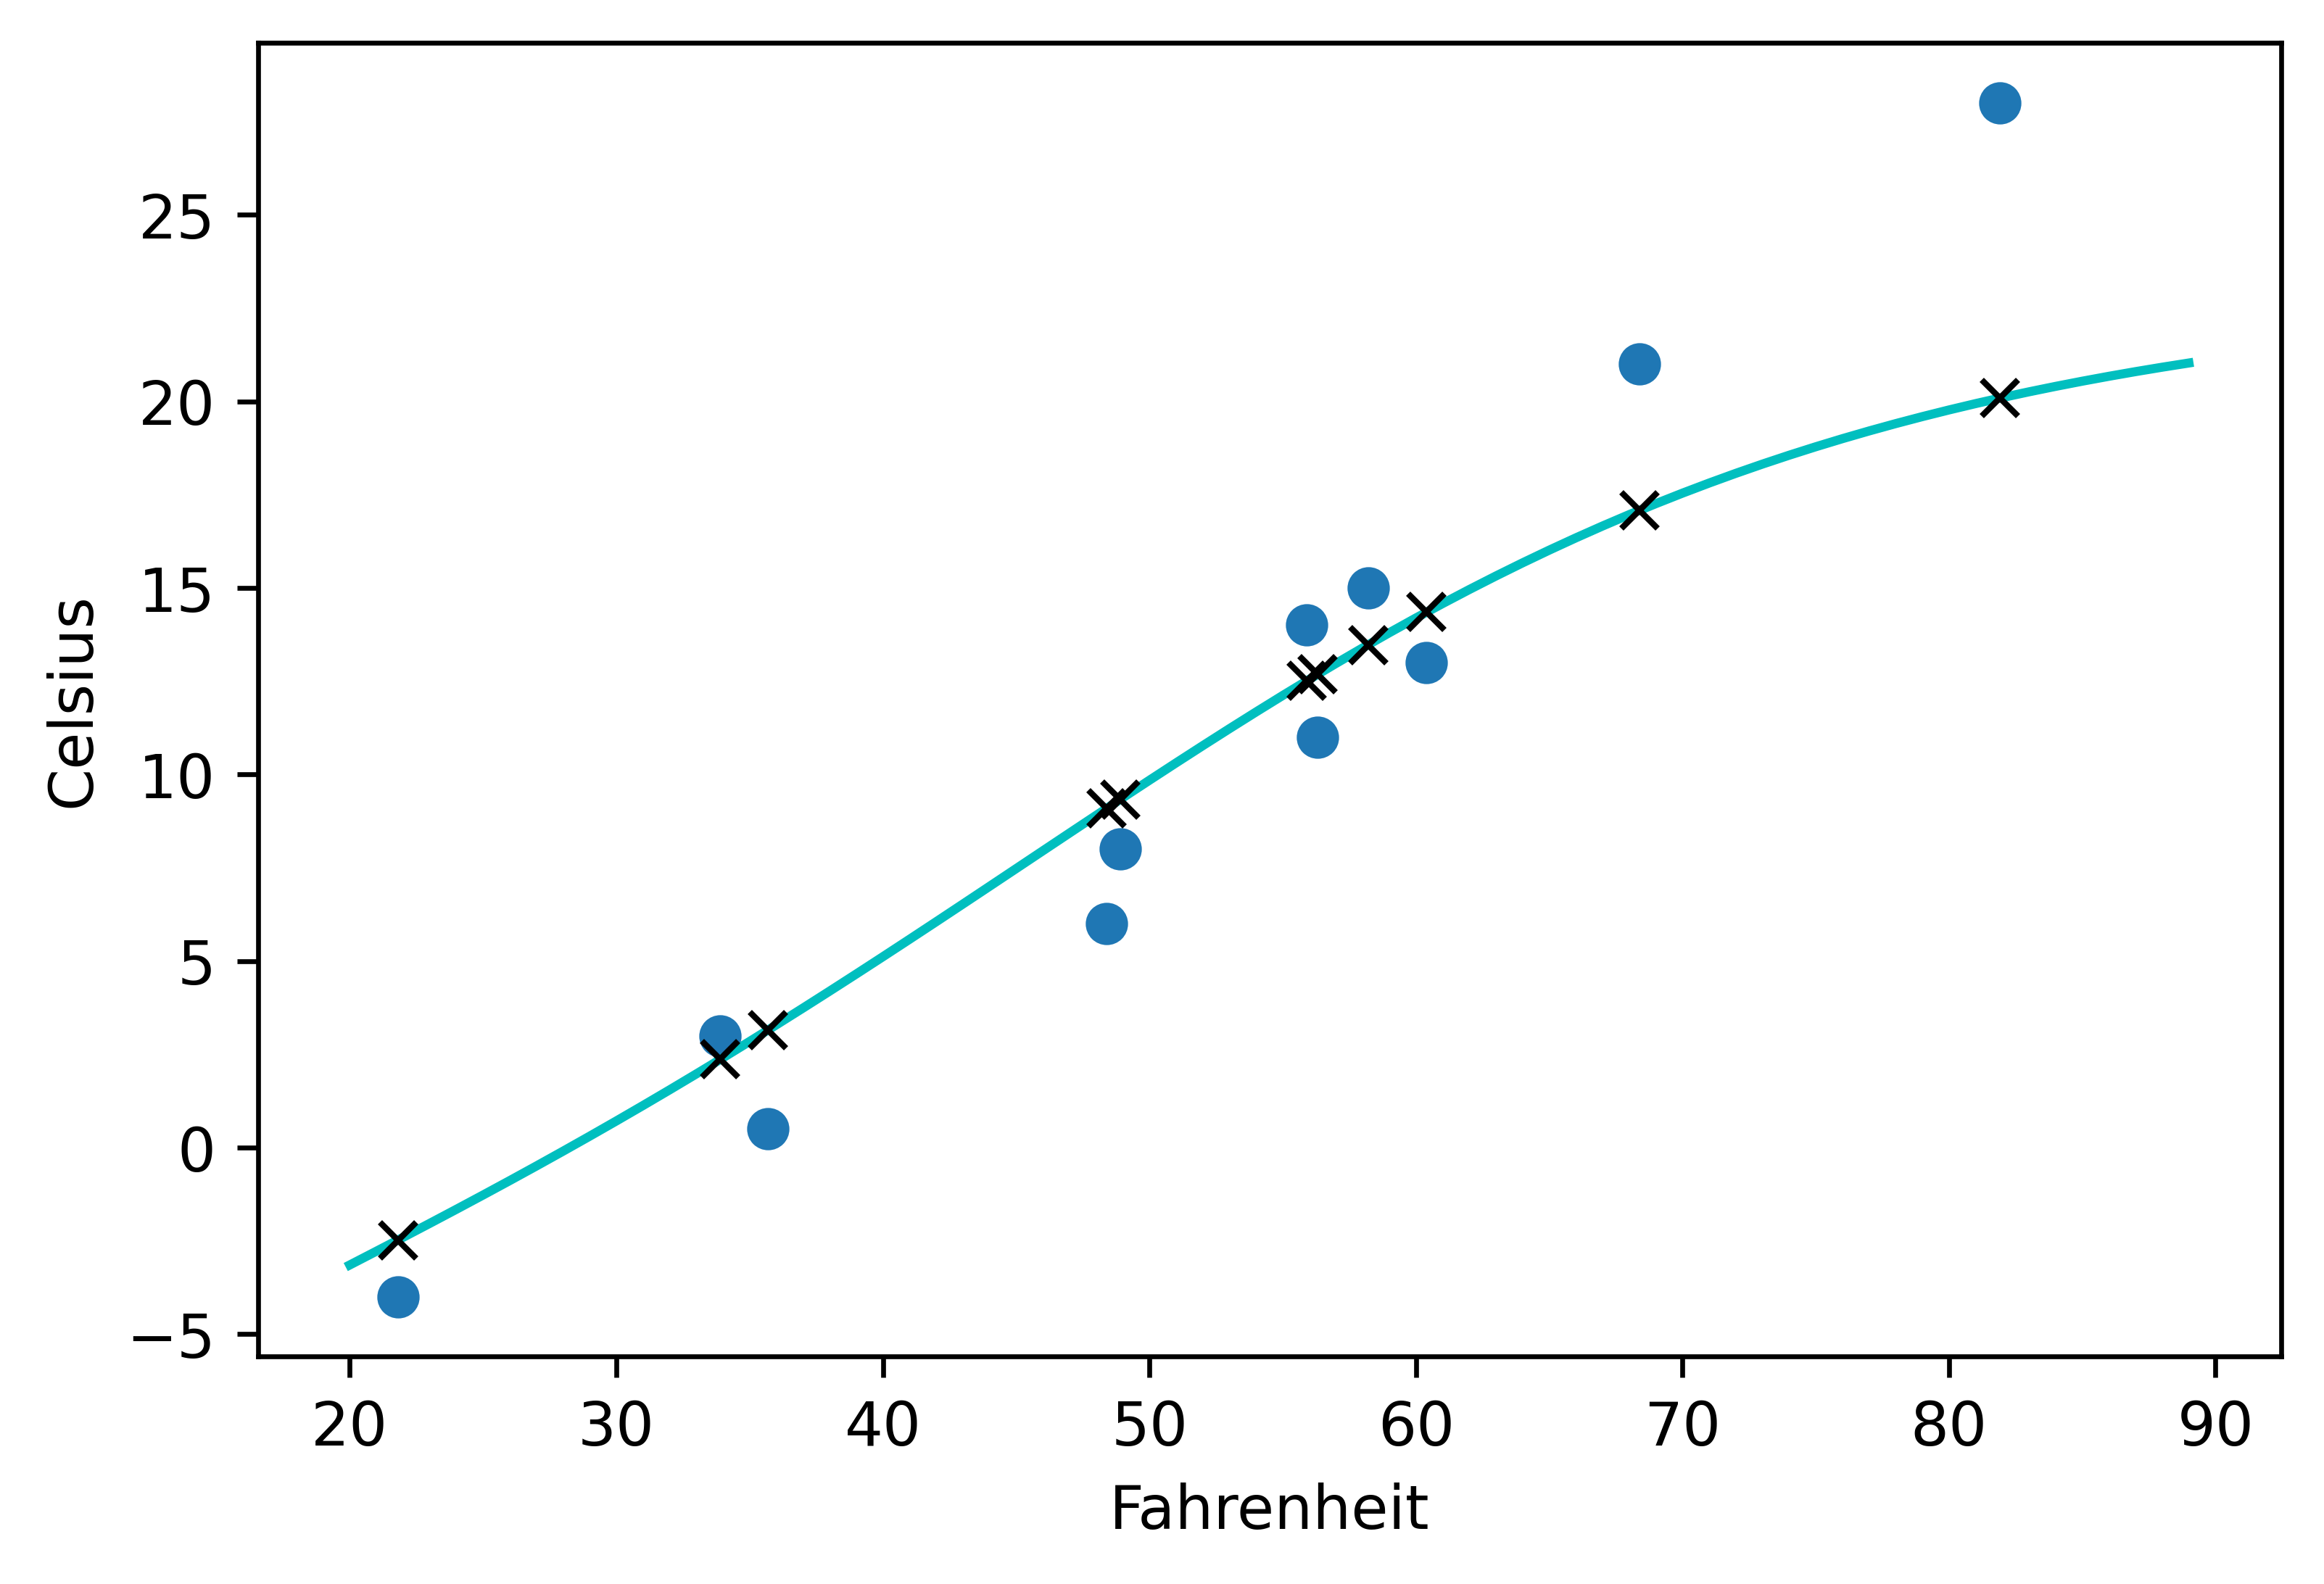

In [36]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 164.2374, Validation loss 276.9968
Epoch 1000, Training loss 58.2044, Validation loss 55.9185
Epoch 2000, Training loss 40.2796, Validation loss 36.4810
Epoch 3000, Training loss 25.9550, Validation loss 23.3508
Epoch 4000, Training loss 15.8238, Validation loss 14.3827
Epoch 5000, Training loss 10.0202, Validation loss 9.0897


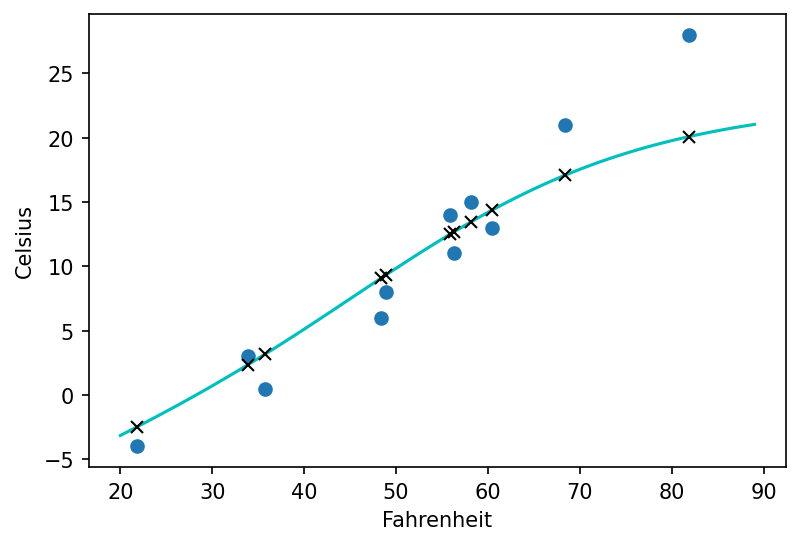

In [33]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


In [34]:
tensor


NameError: name 'tensor' is not defined